# Skript: Histogramm, Boxplot, Violinplot

---


In [1]:
# Modulimporte:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from fontTools.subset import subset
from matplotlib import rcParams

In [2]:
# Datensatz für heute:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Unser Ziel für heute:

![output.png](ziel.png)
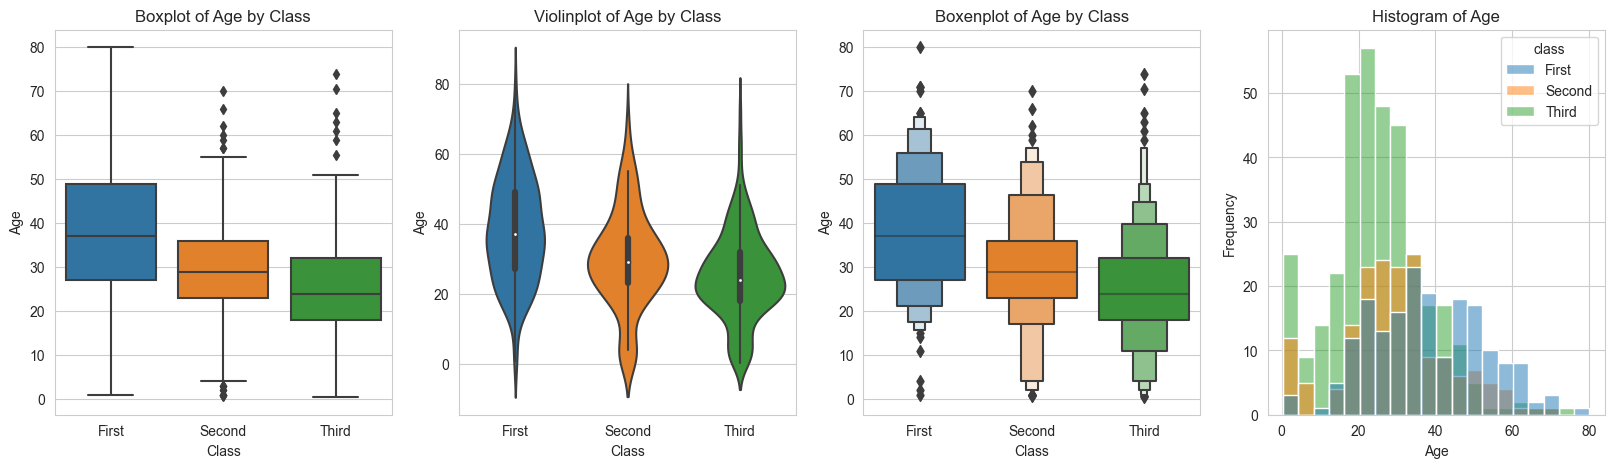

In [3]:
# Mit rcParams kann man Standardeinstellungen, die beim Import von Matplotlib geladen werden,
# mit anderen Werten überschreiben!
# Hier z.B. der Standardwert der "Leinwandgröße" (figsize)
rcParams['figure.figsize']

[6.4, 4.8]

In [4]:
# Hier alle Werte
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
         

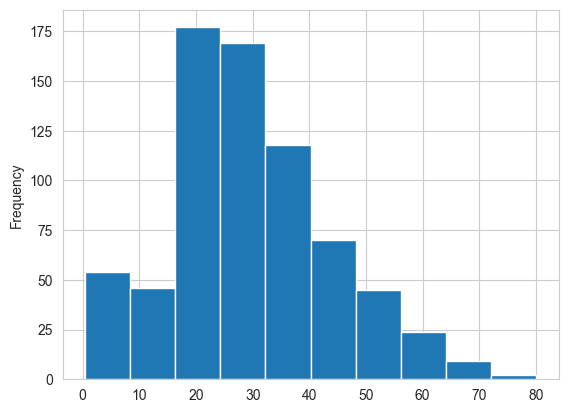

In [5]:
# So groß wäre das:
titanic['age'].plot.hist();

In [6]:
# Lasst uns die figsize für das ganze Notebook großzügig anheben:
rcParams['figure.figsize'] = 10, 5

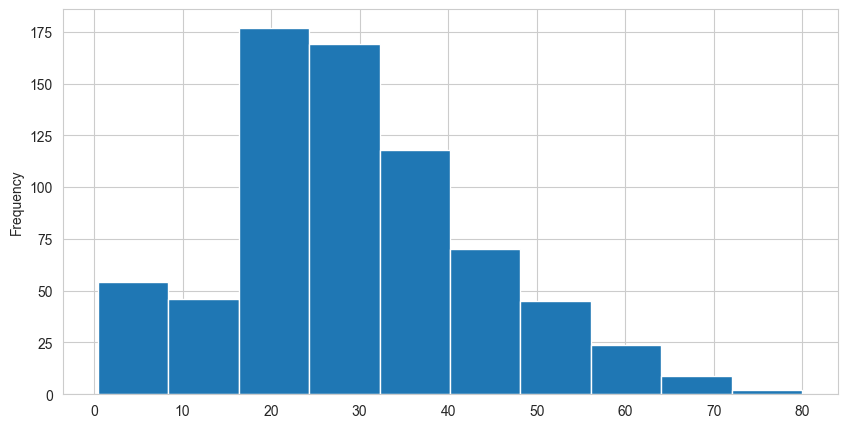

In [7]:
# Jetzt sieht das so aus:
titanic['age'].plot.hist();

In [ ]:
# Quizfrage: Warum hebt sich die figsize bei Pandas an, wenn wir sie eigentlich 
# in der runtime configuation (rc) von Matplotlib angepasst haben?
# ...

# 1. Histogramme

---

Dokumentation zu `seaborn.histplot`:

https://seaborn.pydata.org/generated/seaborn.histplot.html


Zusätzlich gibt es auch `seaborn.kdeplot` (Kerndichteschätzung) oder `seaborn.displot` (High-level Funktion)

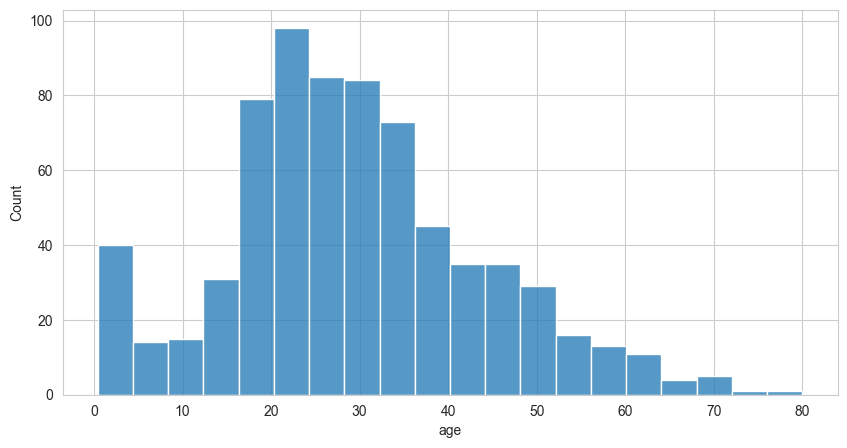

In [8]:
# Einfaches (vertikales) Histogramm mit Alter auf x:
sns.histplot(titanic, x='age');

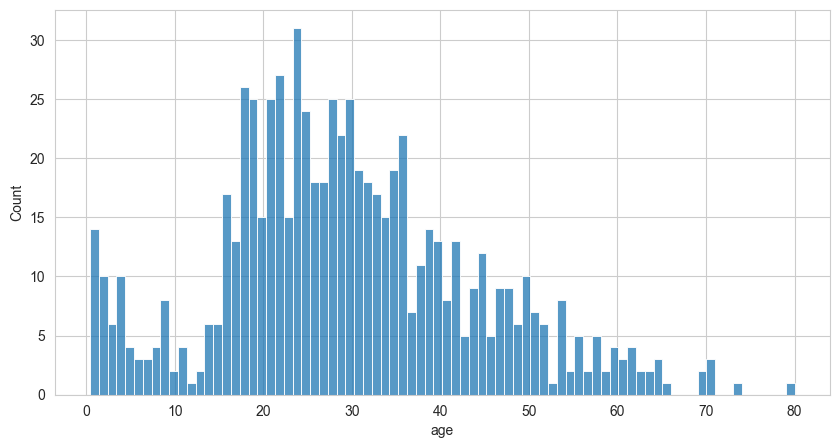

In [9]:
# Bins anpassen:
sns.histplot(titanic,
			 x='age',
			 bins=80);

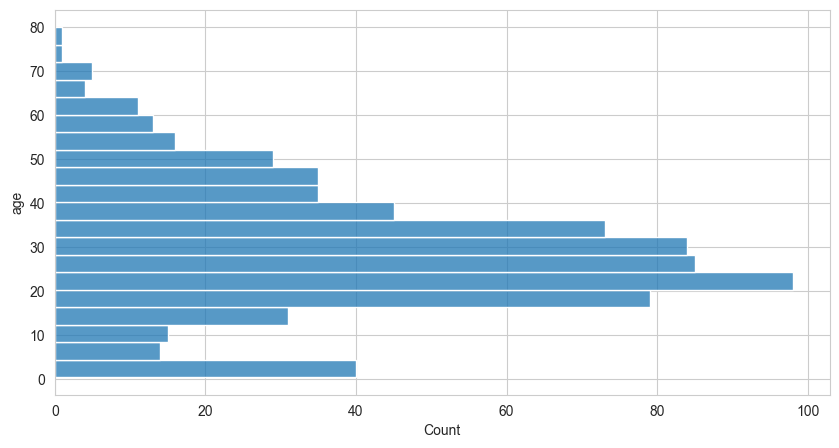

In [10]:
# Horizontales Histogramm:
sns.histplot(titanic,
			 y='age');

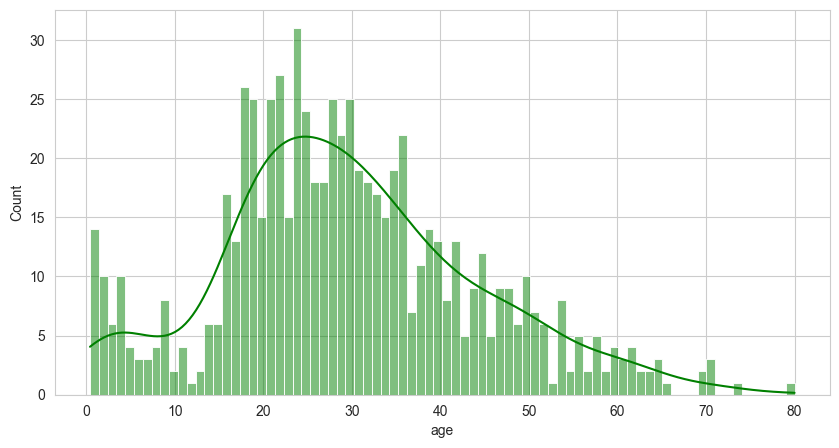

In [11]:
# Histogramm mit geschätzter Verteilungskurve (KDE):
sns.histplot(
	titanic,
	x='age',
	bins=80,
	color='green',
	kde=True
);

# Mehr zu Kernel Density Estimation: https://de.wikipedia.org/wiki/Kerndichtesch%C3%A4tzer

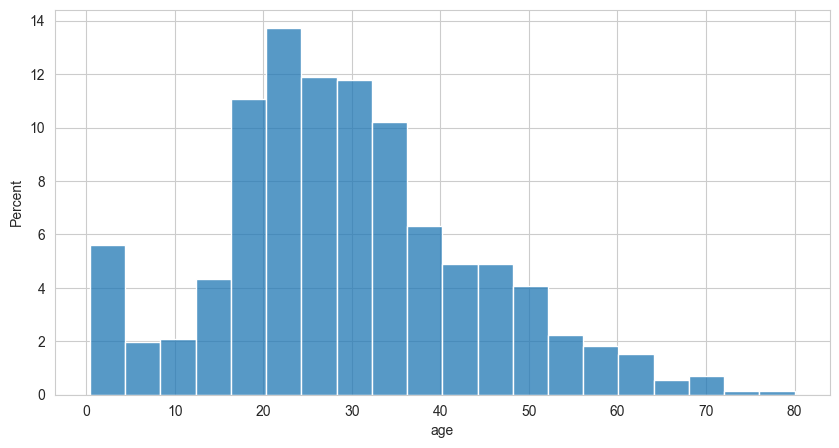

In [12]:
# Statt absoluter Häufigkeiten Prozentangaben erhalten:
sns.histplot(titanic,
			 x='age',
			 stat='percent');

## Gruppierungen in Histogrammen

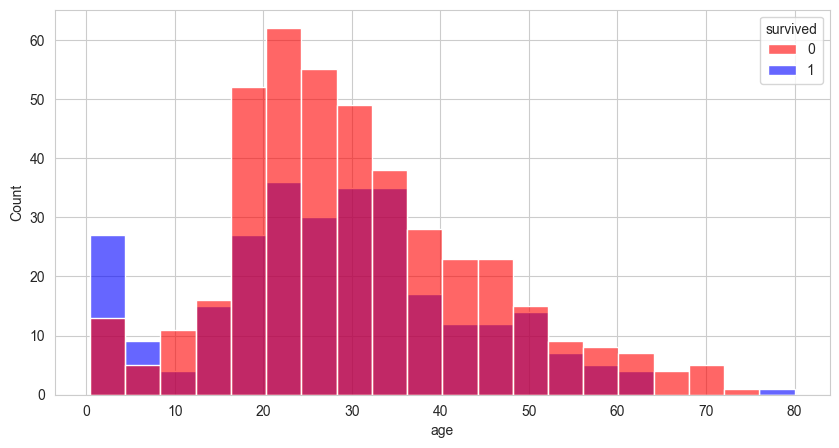

In [13]:
# Mit alpha lässt sich Durchsichtigkeit steuern:
sns.histplot(
	titanic,
	x='age',
	hue='survived',
	alpha=0.6,
	palette={0: 'r', 1: 'b'}
);

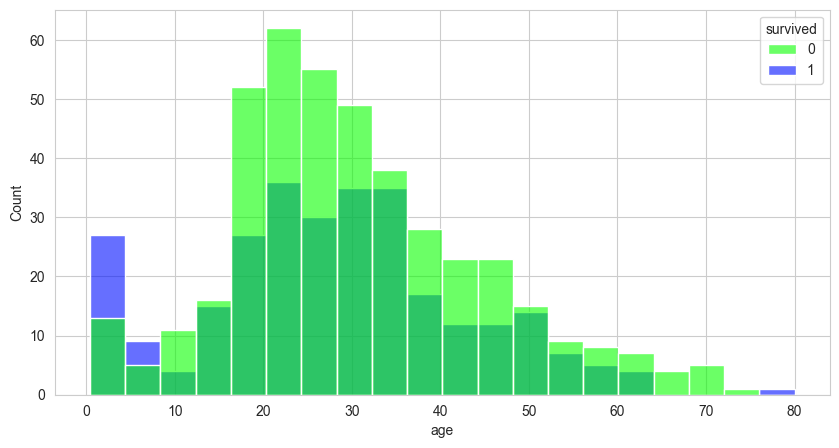

In [26]:
sns.histplot(
	titanic,
	x='age',
	hue='survived',
	alpha=0.6,
	palette='hsv'  # Vorgegebene Paletten nutzen
);
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

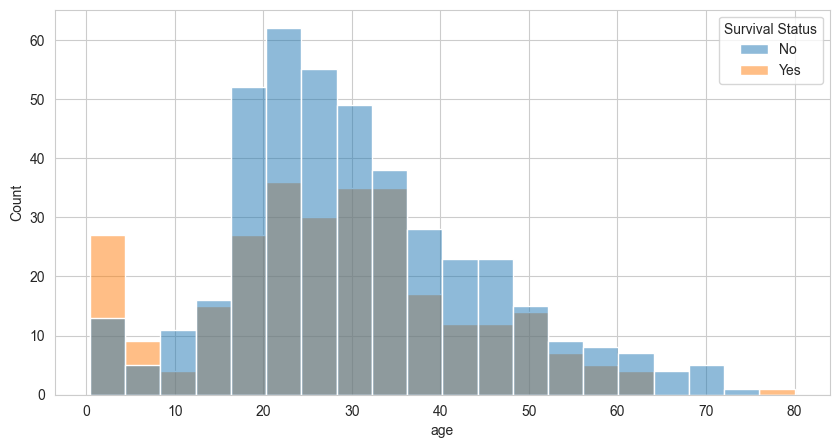

In [15]:
# Wie können wir die Legende ändern?
# Wir wollen für 0 "No" und für 1 "Yes" stehen haben.
# Als Lösung die Legende über 'ax' anpassen:
ax = sns.histplot(
	titanic,
	x='age',
	hue='survived'
)

ax.legend(title='Survival Status',
		  handles=ax.legend_.legend_handles,
		  labels=['No', 'Yes']);

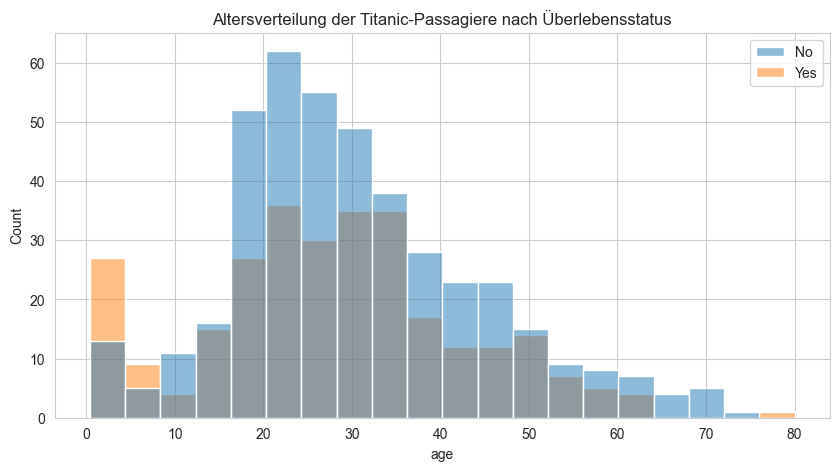

In [16]:
# Alternativ kann man auch mit matplotlib.pyplot in den Plot eingreifen.
# Das importieren wir immer eingangs als plt (siehe Imports).
sns.histplot(titanic,
			 x="age",
			 hue="survived")

plt.legend(handles=ax.legend_.legend_handles,
		   labels=['No', 'Yes'])

plt.title('Altersverteilung der Titanic-Passagiere nach Überlebensstatus');

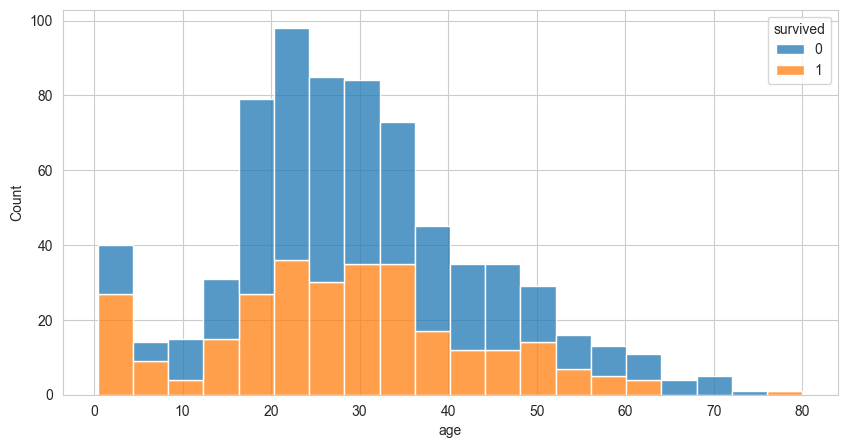

In [17]:
# Histogramm stapeln:
sns.histplot(titanic,
			 x='age',
			 hue='survived',
			 multiple='stack');

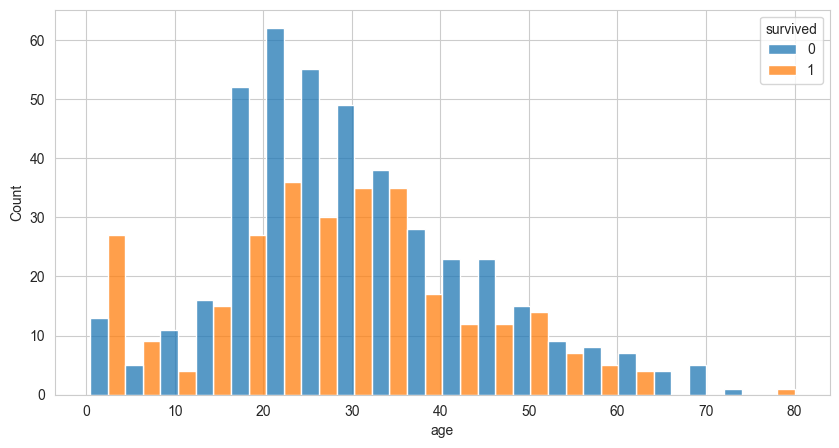

In [18]:
# Histogramme versetzen:
sns.histplot(titanic,
			 x='age',
			 hue='survived',
			 multiple='dodge');

## Andere Darstellungsarten:

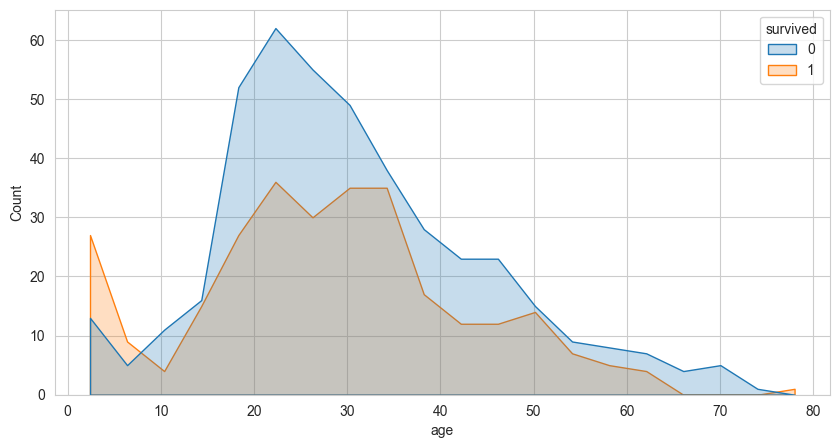

In [19]:
# Andere Stilarten (Polygon/ Flächendiagramm):
sns.histplot(titanic,
			 x='age',
			 hue='survived',
			 element='poly');

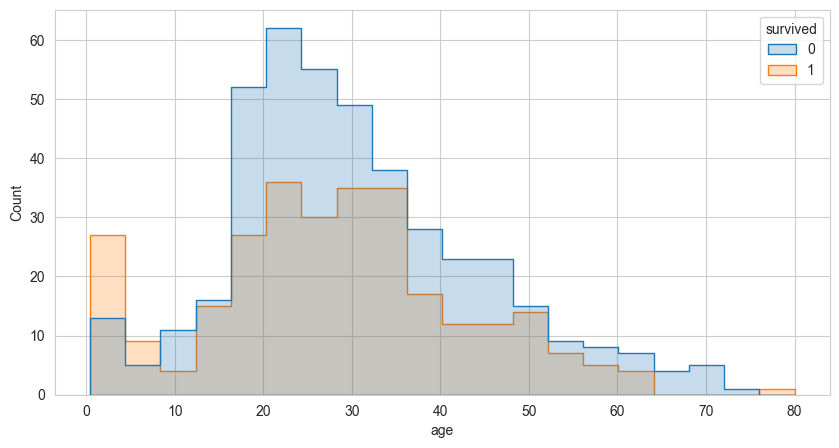

In [20]:
# Stufendarstellung:
sns.histplot(titanic,
			 x='age',
			 hue='survived',
			 element='step');

## Kumulative Histogramme

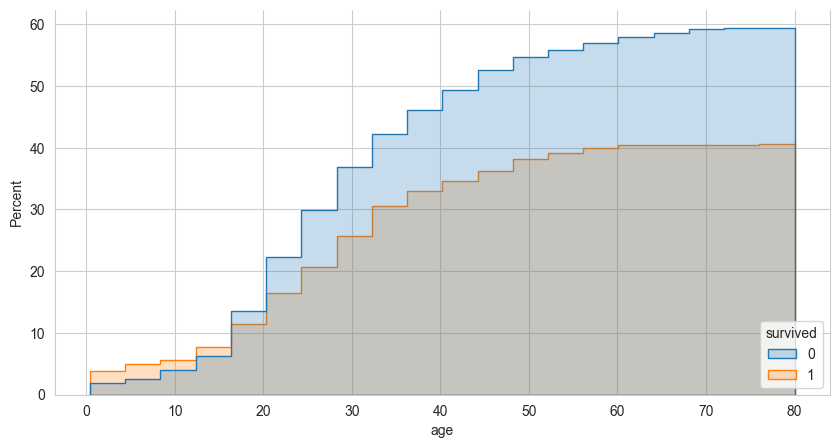

In [21]:
# Kumulative Darstellung (hier step sehr günstig!)
ax = sns.histplot(
	titanic,
	x='age',
	hue='survived',
	element='step',
	cumulative=True,
	stat='percent'
)

# Mit despine lassen sich Begrenzungen des Diagramms entfernen:
sns.despine(top=True, right=False)

# Mit sns.move_legend lässt sich die Legende verschieben:
sns.move_legend(ax, loc='lower right')
# Mehr hier: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend

## Übungsaufgabe

1. Erstelle folgende Graphik:

![histplot.png](1_histplot.png)

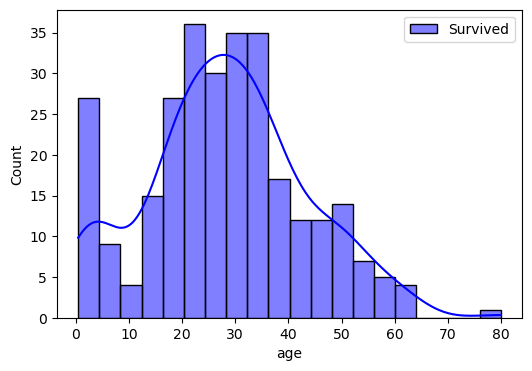

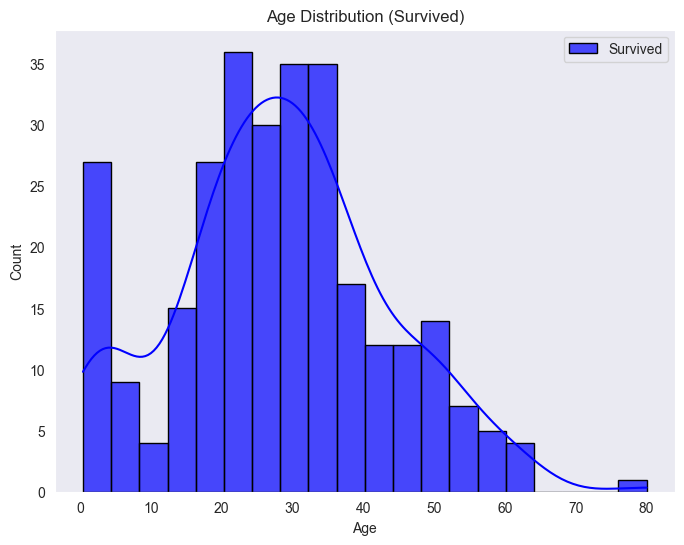

In [65]:
survivors = titanic[titanic["survived"] == 1]

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))

with sns.axes_style("dark"):
	plot1 = sns.histplot(
		survivors,
		x="age",
		bins=20,
		kde=True,
		color="blue",
		edgecolor="black",
		alpha=0.7,
		label="Survived",
	)

	plt.xlabel("Age")
	plt.ylabel("Count")
	plt.title("Age Distribution (Survived)")
	plt.legend()

plot1;

2. Erstelle folgende Graphik:

![histplot2.png](2_histplot.png)
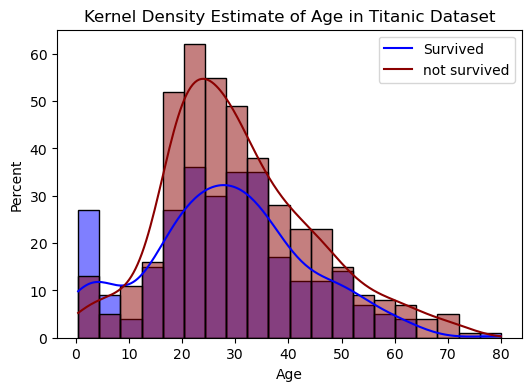

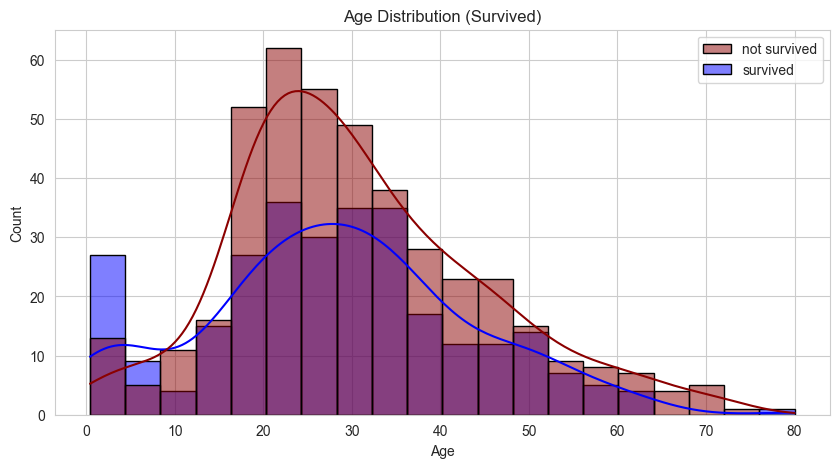

In [67]:
plot2 = sns.histplot(
	titanic,
	x="age",
	hue="survived",
	bins=20,
	kde=True,
	edgecolor="black",
	multiple="layer",
	alpha=0.5,
	label="Survived",
	palette={0: "darkred", 1: "blue"},
)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution (Survived)")

plt.legend(
	handles=plot2.legend_.legend_handles,
	labels=['not survived', 'survived']
)

plot2;

# 2. Boxplot

---

Ein Boxplot stellt die Verteilung der Daten in kompakter Form dar.

Die Box setzt sich aus dem Interquartilsabstand (Interquartile Range, IQR) zusammen, also aus den mittleren 50 Prozent der Daten.

Whiskers/Zäune stehen für die Enden der Box plus/minus 1.5mal die Breite der Box (IQR).

Gibt es Punkte, welche außerhalb der Whiskers liegen, werden diese als Ausreißer dargestellt.

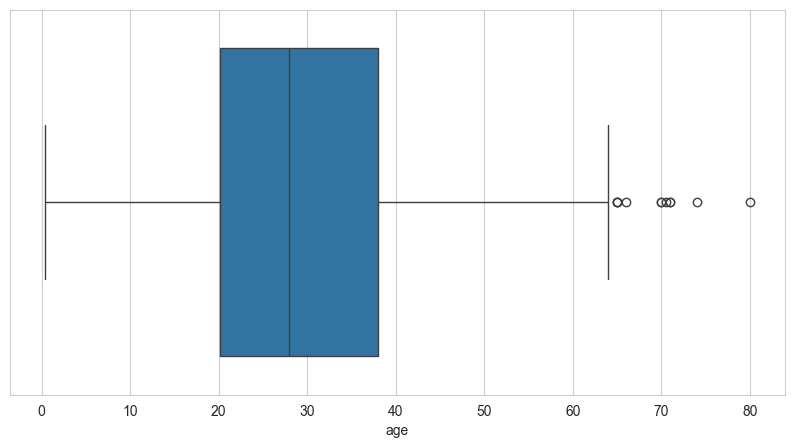

In [68]:
# Horizontaler einfacher Boxplot:
sns.boxplot(titanic,
			x='age');

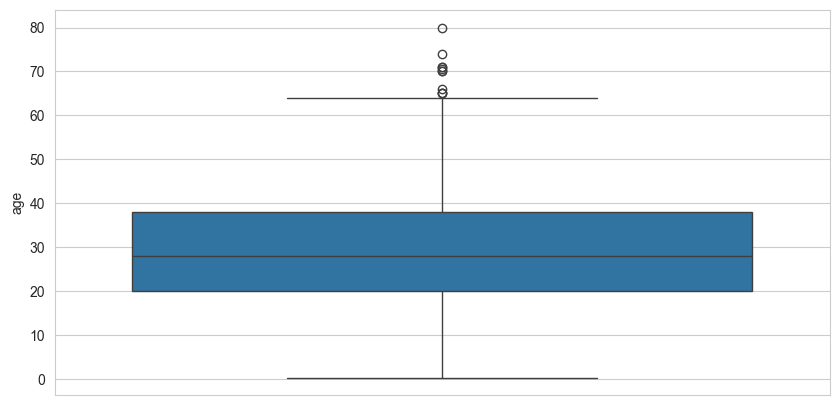

In [69]:
# Vertikaler Boxplot:
sns.boxplot(titanic,
			y='age');

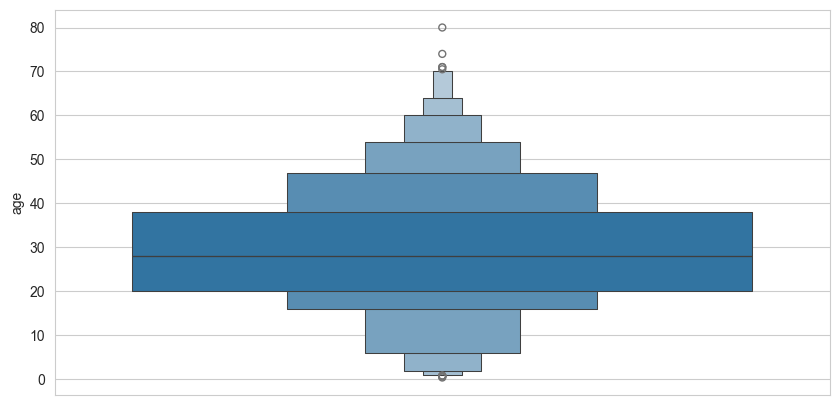

In [70]:
# Eine besondere Form: der Boxenplot (Standard-Boxenerstellung 'exponential'):
sns.boxenplot(titanic,
			  y='age');

In [ ]:
# Für die Boxen in beide Richtung des Medians gilt:
# 25%; 12,5%; 6,25%, 3,125%; 1,56%; 0,78%.
# Keine Sorge, dieser Plot kommt selten zum Einsatz!

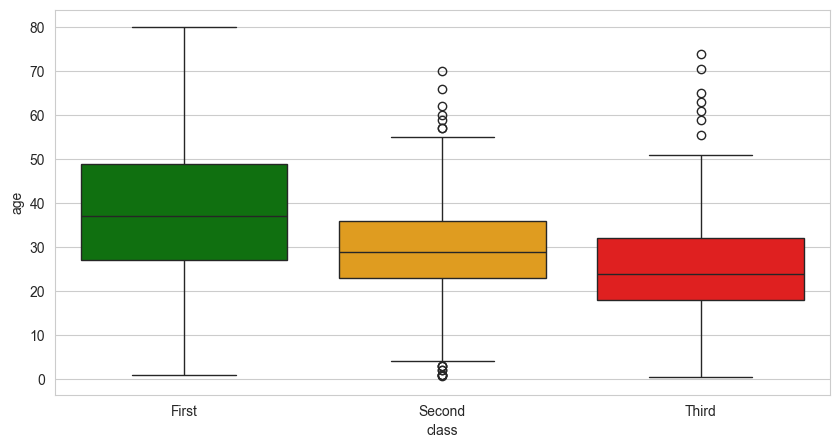

In [71]:
# Back to basics: Boxplot, unterteilt in Klassen:
colors = {'First': 'green', 'Second': 'orange', 'Third': 'red'}

sns.boxplot(titanic,
			y='age',
			x='class',
			hue='class',
			palette=colors);

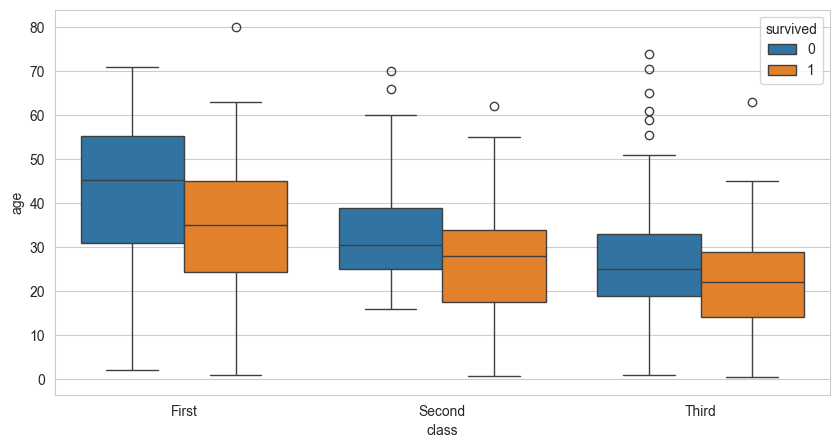

In [72]:
sns.boxplot(titanic,
			y='age',
			x='class',
			hue='survived');

## Übungsaufgabe Boxplot

1. Erstelle folgende Graphik:

![boxplot.png](3_boxplot.png)
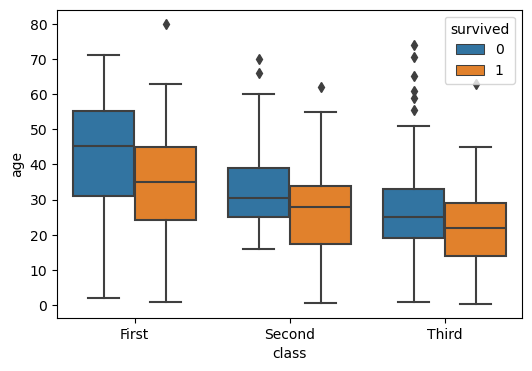

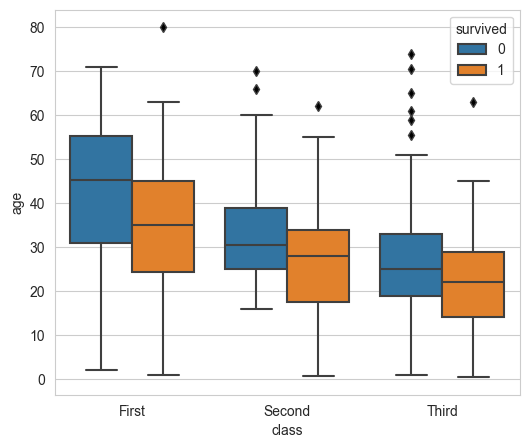

In [134]:
plt.figure(figsize=(6, 5))
plot3 = sns.boxplot(
	titanic,
	y='age',
	x='class',
	hue='survived',
	linewidth=1.5,
	flierprops={"marker": "d", "markerfacecolor": "black"},
	fliersize=5,
)

plot3;

2. Erstelle folgende Graphik:

![boxplot2.png](4_boxplot.png)
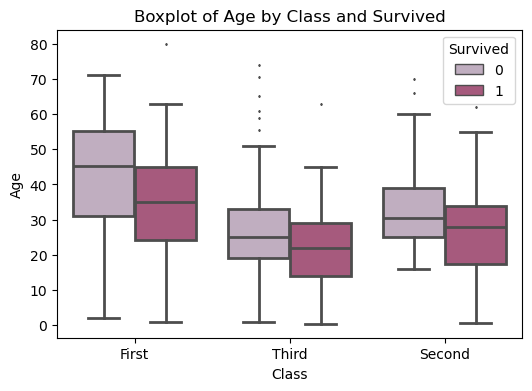

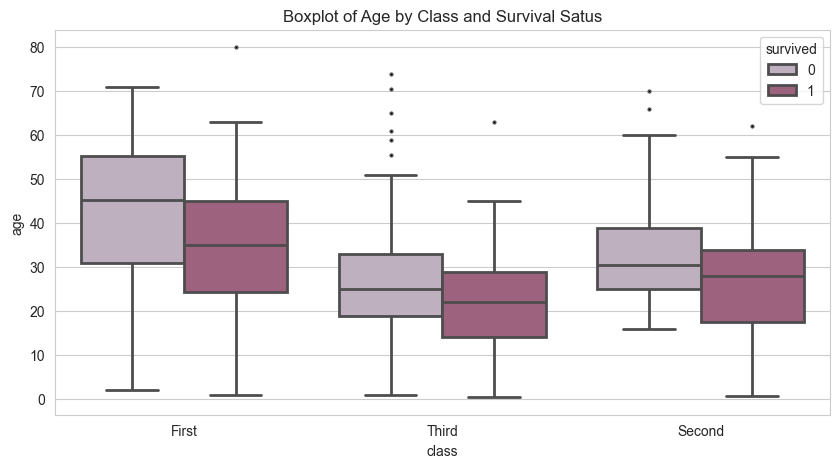

In [139]:
plt.figure(figsize=(10, 5))
plot4 = sns.boxplot(
	titanic,
	y='age',
	x='class',
	hue='survived',
	order=["First", "Third", "Second"],
	linewidth=2,
	palette={0: "#c0aec0", 1: "#a65a7d"},
	flierprops={"marker": ".", "markerfacecolor": "black"},
	fliersize=4,
)
plt.title("Boxplot of Age by Class and Survival Satus")
plot4;

# 3. Violinplot

Der Violinplot gehört derselben Familie an wie Box- und Boxenplot.<br>
Der weiße Punkt stellt den Median dar.<br>
Der dicke schwarze Strich entspricht der Box des Boxplots (mittlere 50 Prozent).<br>
Dünne Striche markieren Whiskers.<br>
Die eigentliche Violinenform rührt von einem symmetrischen KDE her, der um den Boxplot liegt.

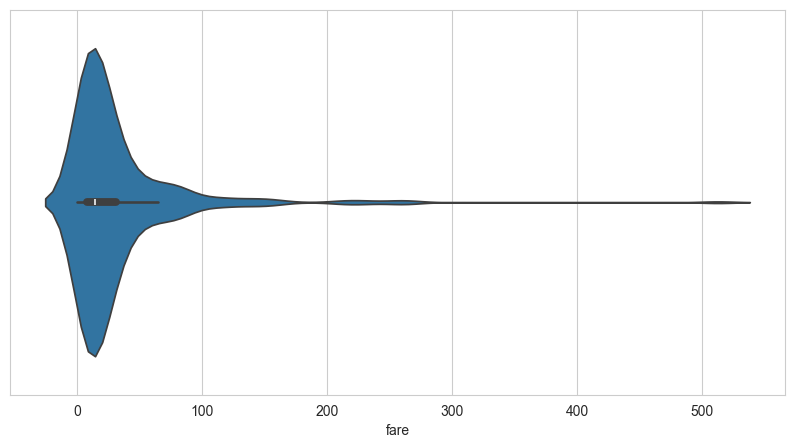

In [140]:
# Verteilung der Titanic-Ticketkosten:
sns.violinplot(titanic, x='fare');

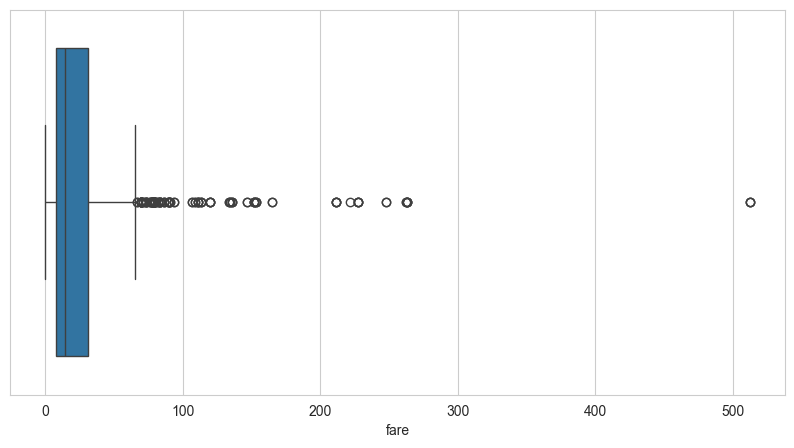

In [141]:
# Zum Vergleich:
sns.boxplot(titanic, x='fare');

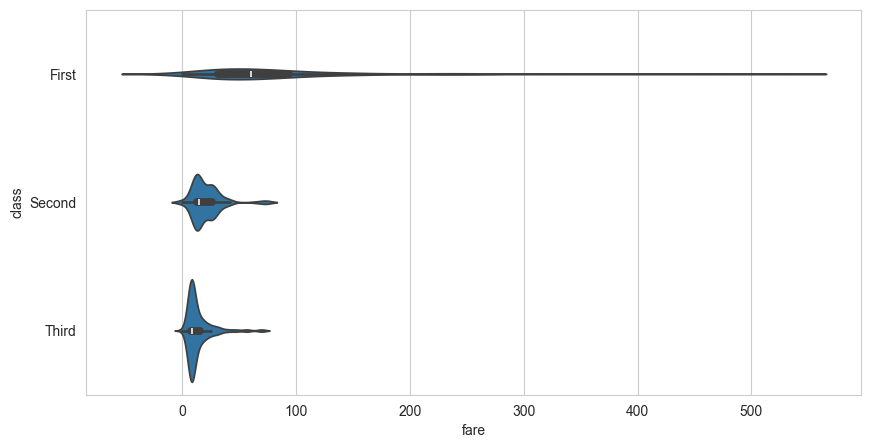

In [142]:
# Auf y nach Gruppen aufteilen:
sns.violinplot(titanic,
			   x='fare',
			   y='class');

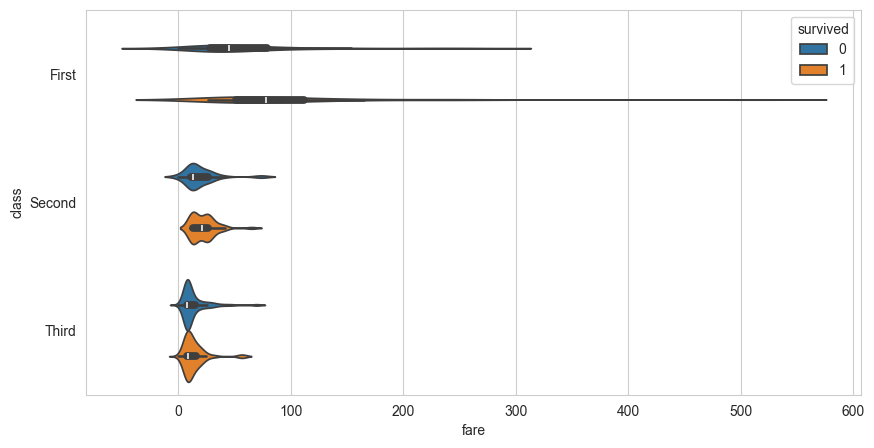

In [143]:
# Auf y nach Klassen aufteilen + mit Farben unterteilen nach Überlebensstatus:
sns.violinplot(titanic,
			   x='fare',
			   y='class',
			   hue='survived');

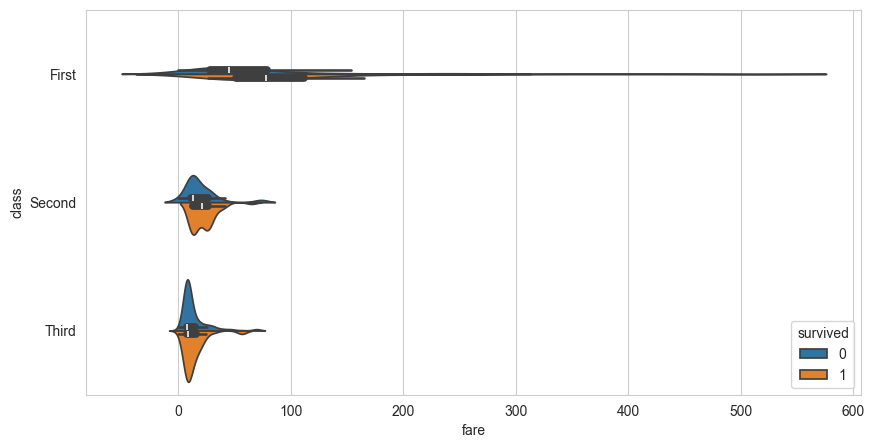

In [144]:
# Violinplot mit split:
ax = sns.violinplot(titanic,
					x='fare',
					y='class',
					hue='survived',
					split=True)

sns.move_legend(ax, loc='lower right');

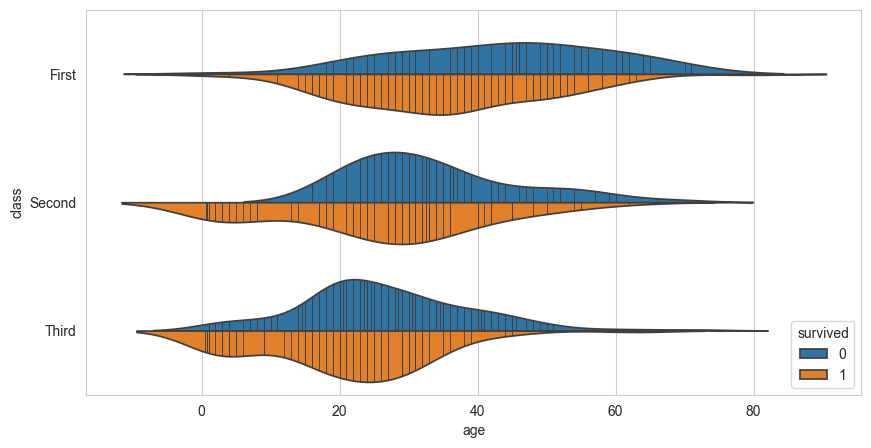

In [145]:
# Datenpunkte sichtbar machen:
sns.violinplot(
	titanic,
	x="age",
	y="class",
	hue="survived",
	split=True,
	inner="stick"
);

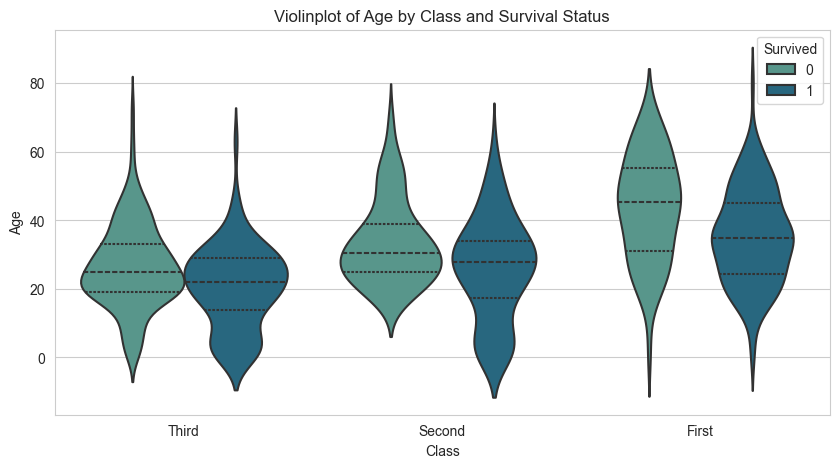

In [156]:
# Beispiel
# Violinplot erstellen:
sns.violinplot(
	titanic,
	x="class",
	y="age",
	hue="survived",
	palette="crest",
	linewidth=1.5,
	saturation=0.8,
	order=["Third", "Second", "First"],
	inner='quartile'
)

# Erscheinungsbild ändern:
plt.title("Violinplot of Age by Class and Survival Status")
plt.xlabel("Class")
plt.ylabel("Age")
plt.legend(title="Survived");

# Subplots erstellen und ausrichten

Mit plt.subplots() erstellt man immer zwei Dinge:<br>
* die "Leinwand" (figure, fig), auf der geplottet wird
* ein oder mehrere ax-Objekte, die Koordinatensysteme samt Plots sind.

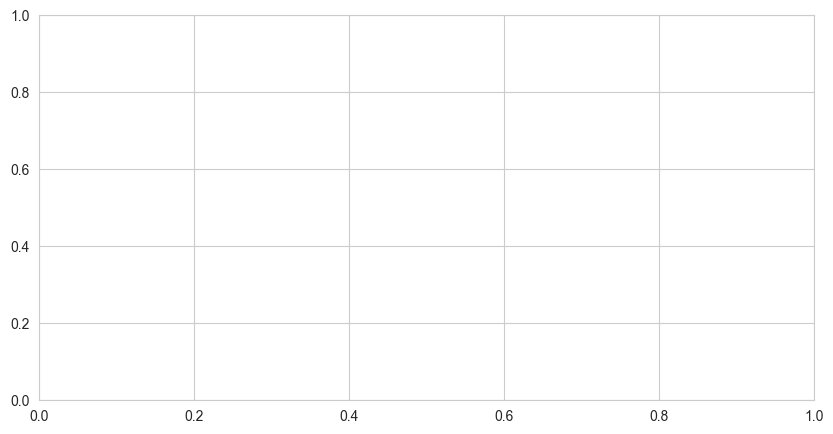

In [147]:
# Subplots erstellen (standardmäßig nur einer)
fig, ax = plt.subplots()

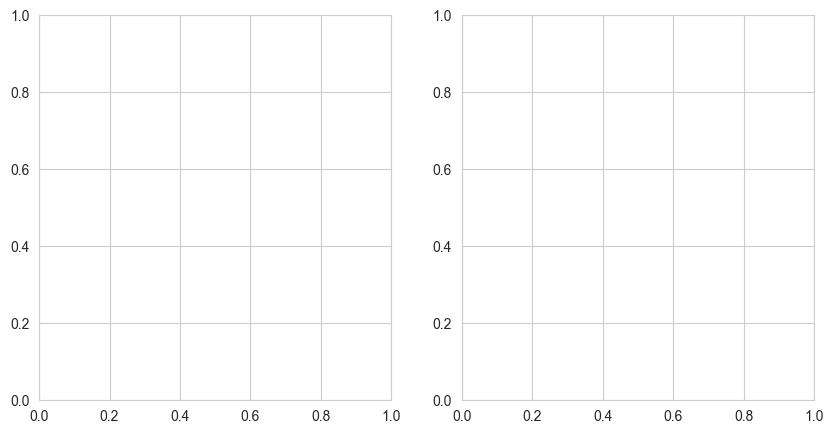

In [148]:
# Ich will zwei (noch leere) Flächen nebeneinander:
fig, (ax1, ax2) = plt.subplots(ncols=2)

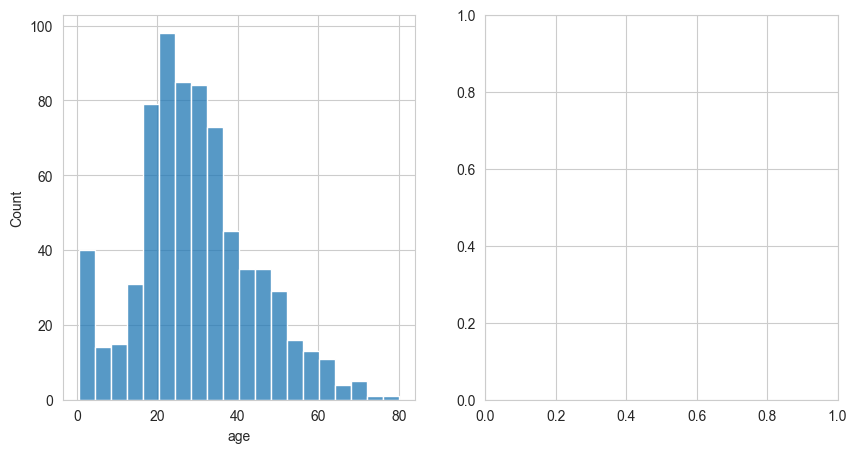

In [149]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

sns.histplot(titanic, x='age', ax=ax1);

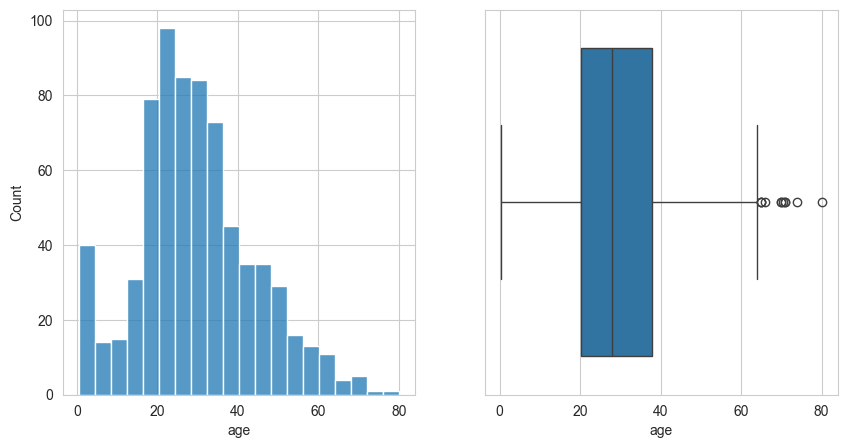

In [150]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

sns.histplot(titanic, x='age', ax=ax1)
sns.boxplot(titanic, x='age', ax=ax2);

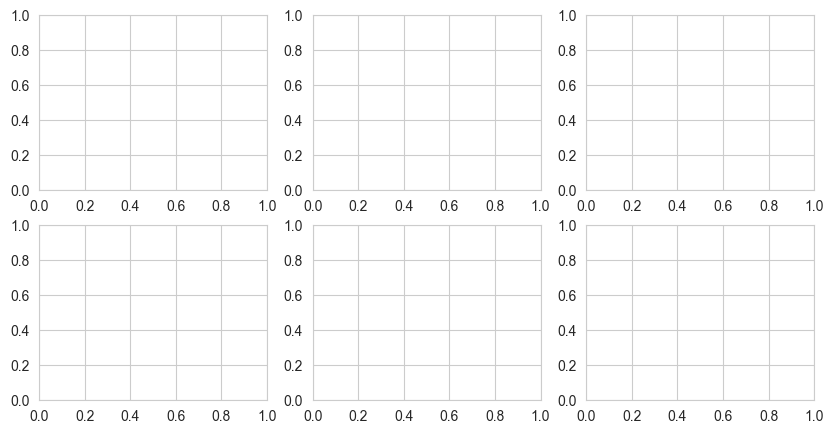

In [151]:
# 2x3 Grafiken: 2 Zeilen und 3 Spalten
# Merksatz: Jede Zeile entspricht einem Tupel und alle Zeilen landen in einem übergeordneten Tupel
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3);

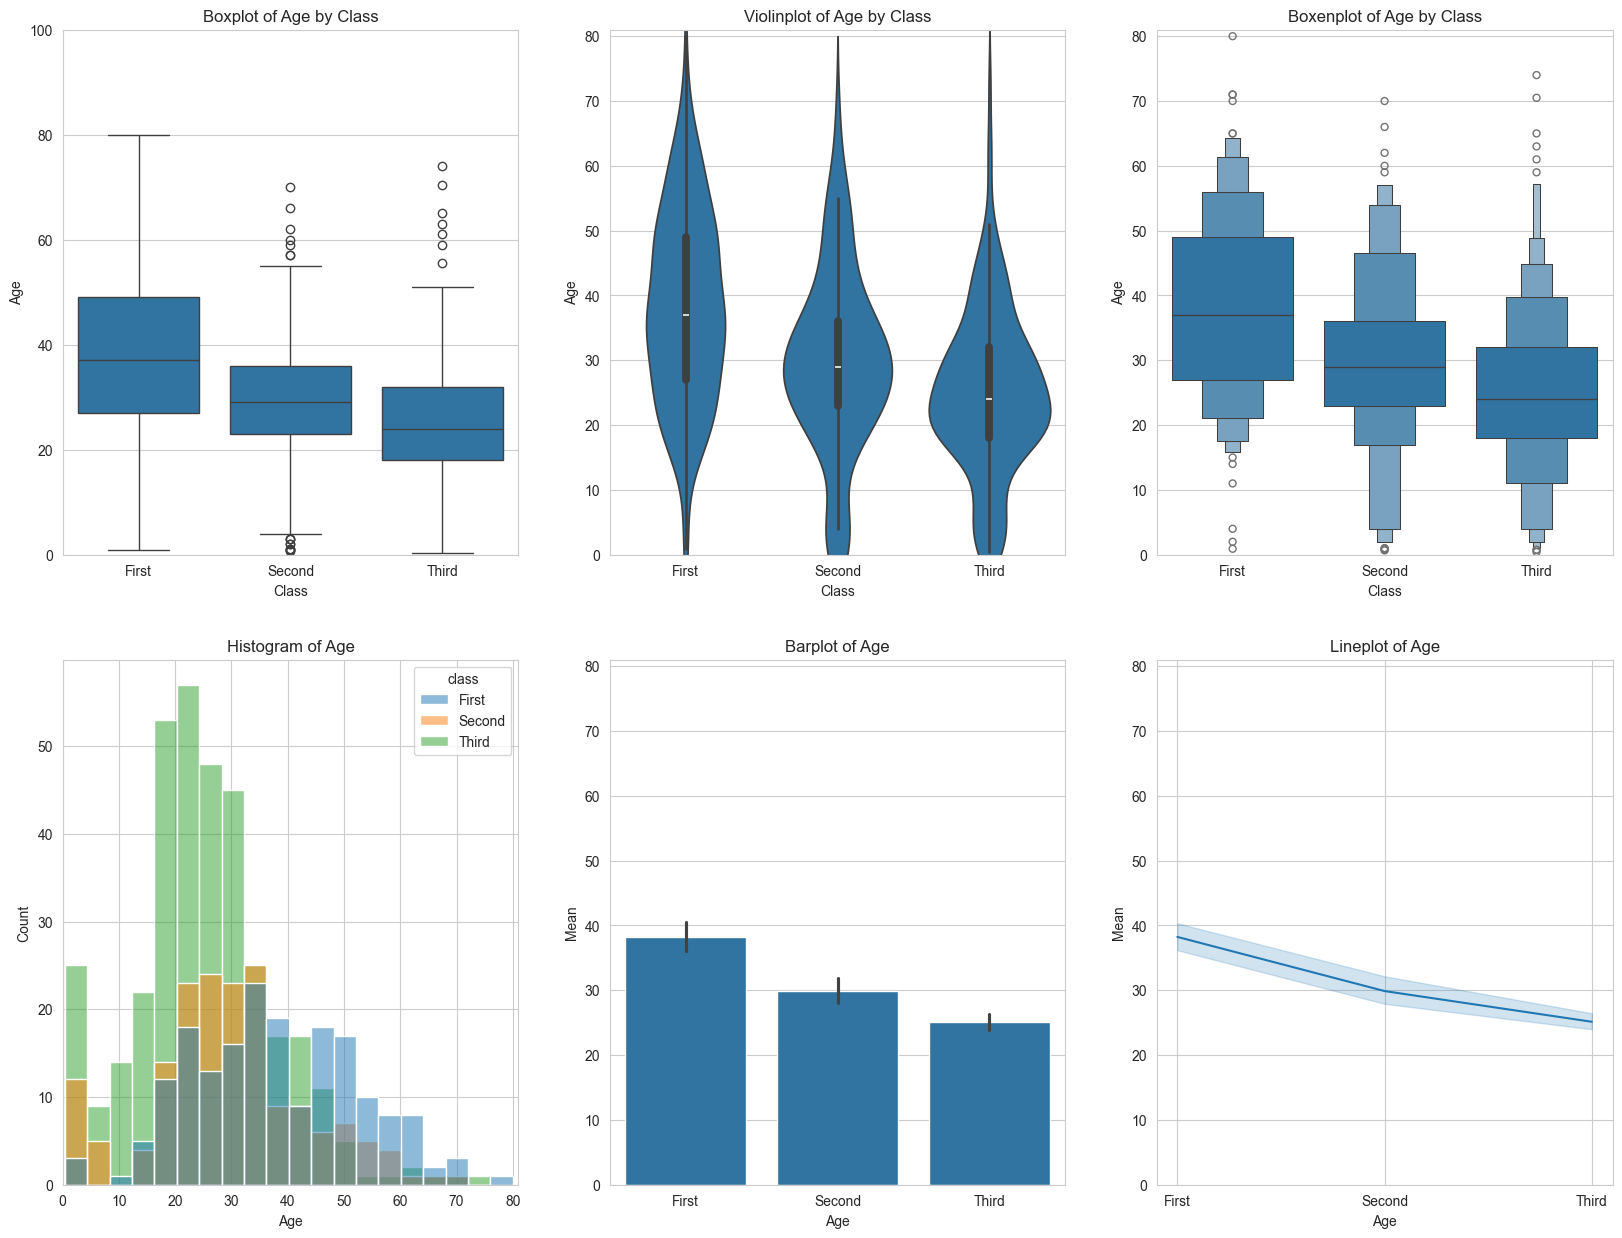

In [152]:
# 2x3-Grafik!

# Erstellen des Subplots
# Zwei Zeilen mit je drei Spalten
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))

# Boxplot auf Position 1 (oder 0 in Python)
sns.boxplot(titanic, x='class', y='age', ax=ax1)
ax1.set(
	title='Boxplot of Age by Class',
	xlabel='Class',
	ylabel='Age',
	ylim=[0, 100]
)

# Violinplot auf Position 2
sns.violinplot(titanic, x='class', y='age', ax=ax2)
ax2.set(
	title='Violinplot of Age by Class',
	xlabel='Class',
	ylabel='Age',
	ylim=[0, 81]
)

# Boxenplot auf Position 3
sns.boxenplot(titanic, x='class', y='age', ax=ax3)
ax3.set(
	title='Boxenplot of Age by Class',
	xlabel='Class',
	ylabel='Age',
	ylim=[0, 81]
)

# Histogramm auf Position 4
sns.histplot(titanic, x='age', hue='class', ax=ax4)
ax4.set(
	title='Histogram of Age',
	xlabel='Age',
	ylabel='Count',
	xlim=[0, 81]
)

# Barplot auf Position 5
sns.barplot(titanic, x='class', y='age', ax=ax5)
ax5.set(
	title='Barplot of Age',
	xlabel='Age',
	ylabel='Mean',
	ylim=[0, 81]
)

# Lineplot auf Position 6 (etwas bemüht)
sns.lineplot(titanic, x='class', y='age', ax=ax6)
ax6.set(
	title='Lineplot of Age',
	xlabel='Age',
	ylabel='Mean',
	ylim=[0, 81]
);

In [ ]:
# Bonusaufgabe:
# Grabe den autoscout24-Datensatz aus und erstelle eine 2x3-Grafik mit sinnvollen Diagrammen!
